In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [590]:
!pip install matplotlib_venn

In [1]:
import awswrangler as wr
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings("ignore")

sns.set_theme()

import itertools
import matplotlib.gridspec as gridspec
from scipy.stats import chi2_contingency
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

import warnings

warnings.filterwarnings("ignore")
import json
from tsai.all import *
from IPython.display import display, Markdown
import json
# from pandas.io.json import json_normalize

from matplotlib.patches import Patch

import matplotlib.dates as mdates

from helper_functions.data_readers import *

from helper_functions.aggregations import *

In [61]:
import matplotlib.ticker as ticker

## helper functions

In [2]:
colors = sns.color_palette(
    [
        "#184EAD",
        "#648fff",
        "#88ccee",
        "#ae9ef7",
        "#6844d5",
        "#332288",
        "#c52dac",
        "#ef4341",
        "#84164c",
        "#cb6577",
        "#ff6100",
        "#90550f",
        "#c78d1b",
        "#ffb003",
        "#ddcc77",
        "#a2c662",
        "#40a018",
        "#117347",
        "#43aa99",
    ]
)

color_list = [
    "#184EAD",
    "#648fff",
    "#88ccee",
    "#ae9ef7",
    "#6844d5",
    "#332288",
    "#c52dac",
    "#ef4341",
    "#84164c",
    "#cb6577",
    "#ff6100",
    "#90550f",
    "#c78d1b",
    "#ffb003",
    "#ddcc77",
    "#a2c662",
    "#40a018",
    "#117347",
    "#43aa99",
]

%matplotlib inline
color_list = [
    "#184EAD",
    "#648fff",
    "#88ccee",
    "#ae9ef7",
    "#6844d5",
    "#332288",
    "#c52dac",
    "#ef4341",
    "#84164c",
    "#cb6577",
    "#ff6100",
    "#90550f",
    "#c78d1b",
    "#ffb003",
    "#ddcc77",
    "#a2c662",
    "#40a018",
    "#117347",
    "#43aa99",
]


def show_color_pallete(pallete):
    # fig, ax = plt.subplots()

    sns.palplot(pallete, size=2)
    ax = plt.gca()
    for i, name in enumerate(pallete):
        label = f"[{i}]"
        ax.text(i, -0.57, label, horizontalalignment="center", fontsize=10)
    plt.show()

### plotting & annotations

In [5]:
# class SeabornFig2Grid():

#  def __init__(self, seaborngrid, fig,  subplot_spec):
#      self.fig = fig
#      self.sg = seaborngrid
#      self.subplot = subplot_spec
#      if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
#          isinstance(self.sg, sns.axisgrid.PairGrid):
#          self._movegrid()
#      elif isinstance(self.sg, sns.axisgrid.JointGrid):
#          self._movejointgrid()
#      self._finalize()

#  def _movegrid(self):
#      """ Move PairGrid or Facetgrid """
#      self._resize()
#      n = self.sg.axes.shape[0]
#      m = self.sg.axes.shape[1]
#      self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
#      for i in range(n):
#          for j in range(m):
#              self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

#  def _movejointgrid(self):
#      """ Move Jointgrid """
#      h= self.sg.ax_joint.get_position().height
#      h2= self.sg.ax_marg_x.get_position().height
#      r = int(np.round(h/h2))
#      self._resize()
#      self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

#      self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
#      self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
#      self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

#  def _moveaxes(self, ax, gs):
#      #https://stackoverflow.com/a/46906599/4124317
#      ax.remove()
#      ax.figure=self.fig
#      self.fig.axes.append(ax)
#      self.fig.add_axes(ax)
#      ax._subplotspec = gs
#      ax.set_position(gs.get_position(self.fig))
#      ax.set_subplotspec(gs)

#  def _finalize(self):
#      plt.close(self.sg.fig)
#      self.fig.canvas.mpl_connect("resize_event", self._resize)
#      self.fig.canvas.draw()

#  def _resize(self, evt=None):
#      self.sg.fig.set_size_inches(self.fig.get_size_inches())


In [6]:
# def annotate(ax, data, x_col, y_col):
#     x = np.array(data[x_col]).reshape((-1, 1))
#     y = np.array(data[y_col]).reshape((-1, 1))
#     model = LinearRegression()
#     model.fit(x,y)
#     r2 = model.score(x,y)
#     coefficients = model.coef_
#     intercept = model.intercept_


#     beta0 = r'$intercept = \hat\beta_0 =$' + str(round(intercept[0],2))

#     beta1 = r'$slope = \hat\beta_1 =$' + str(round(coefficients[0][0],2))

#     r_squared = r'$R^2 =$' + str(round(r2,2))

#     textstr = '\n'.join((
#         beta0, beta1, r_squared
#     ))
#     props = dict(boxstyle='round', facecolor='white', alpha=0.35)
#     ax.text(.7 , .75, textstr, transform=ax.transAxes, fontsize=9, weight = 'bold', horizontalalignment='center', bbox=props)

## Reading in Data

##### st patrick data

In [3]:
# ST Patrick Trips
StPatrick1data = get_data(boat="stpatrick", trip_no=0)
StPatrick2data = get_data(boat="stpatrick", trip_no=1)

counts_StPatrick1 = StPatrick1data["all_counts"]
counts_StPatrick2 = StPatrick2data["all_counts"]

stpatrick1_elog = StPatrick1data["elogs"]
stpatrick2_elog = StPatrick2data["elogs"]

stpatrick1_bv_set_counts = StPatrick1data["bv_set_counts"]
stpatrick1_bv_set_counts = StPatrick2data["bv_set_counts"]

{'trip_id': 'stpatrick_2024-01-03', 'trip_start_date': '2024-01-03', 'trip_end_date': '2024-01-28'}
{'trip_id': 'stpatrick_2024-02-03', 'trip_start_date': '2024-02-03', 'trip_end_date': '2024-02-28'}


In [4]:
stpatrick1_bv_sets = StPatrick1data["bv_sets"]
stpatrick2_bv_sets = StPatrick2data["bv_sets"]

In [5]:
counts_StPatrick1.head()

,id,overallcount,overallcatches,overalldiscards,count,detection_confidence,start_datetime,utc_start_datetime,utc_end_datetime,weighted_count,bv_count
2327,6249,3.0,<NA>,<NA>,NaN,<NA>,2024-01-03 13:10:00+00:00,2024-01-03 13:10:00,2024-01-03 13:15:00,<NA>,0.0
1750,6250,10.0,<NA>,<NA>,NaN,<NA>,2024-01-03 13:15:00+00:00,2024-01-03 13:15:00,2024-01-03 13:20:00,<NA>,0.0
2328,6251,17.0,<NA>,<NA>,NaN,<NA>,2024-01-03 13:20:00+00:00,2024-01-03 13:20:00,2024-01-03 13:25:00,<NA>,0.0
2329,6252,6.0,<NA>,<NA>,NaN,<NA>,2024-01-03 13:25:00+00:00,2024-01-03 13:25:00,2024-01-03 13:30:00,<NA>,0.0
1751,6253,9.0,<NA>,<NA>,NaN,<NA>,2024-01-03 13:35:00+00:00,2024-01-03 13:35:00,2024-01-03 13:40:00,<NA>,0.0


##### brancol data

In [6]:
# Brancol Trips
Brancol1data = get_data(boat="brancol", trip_no=0)
Brancol2data = get_data(boat="brancol", trip_no=1)
Brancol3data = get_data(boat="brancol", trip_no=2)


counts_Brancol1 = Brancol1data["all_counts"]
counts_Brancol2 = Brancol2data["all_counts"]
counts_Brancol3 = Brancol3data["all_counts"]

brancol1_elog = Brancol1data["elogs"]
brancol2_elog = Brancol2data["elogs"]
brancol3_elog = Brancol3data["elogs"]

brancol2_bv_sets = Brancol2data["bv_sets"]
brancol1_bv_sets = Brancol1data["bv_sets"]
brancol3_bv_sets = Brancol3data["bv_sets"]

brancol1_bv_set_counts = Brancol1data["bv_set_counts"]
brancol2_bv_set_counts = Brancol2data["bv_set_counts"]
brancol3_bv_set_counts = Brancol3data["bv_set_counts"]

brancol1trip = Brancol1data["trip_info"]
brancol2trip = Brancol2data["trip_info"]
brancol3trip = Brancol3data["trip_info"]

{'trip_id': 'brancol_2024-01-05', 'trip_start_date': '2024-01-05', 'trip_end_date': '2024-01-26'}
{'trip_id': 'brancol_2024-02-03', 'trip_start_date': '2024-02-03', 'trip_end_date': '2024-02-26'}
{'trip_id': 'brancol_2024-03-05', 'trip_start_date': '2024-03-05', 'trip_end_date': '2024-04-01'}


##### 

## Elog Comparisons

##### helper functions

In [8]:
# def plot_hlines(ax, df, y_val, start_col, end_col, width, color, label):
#     ax.hlines(
#         y = np.full(len(df), y_val),
#         xmin = df[start_col].values.reshape((-1,1)),
#         xmax =df[end_col].values.reshape((-1,1)),
#         linewidth = width,colors= color, label = label
#     )

# def plot_set_hlines(ax, df, source, color_dict):
#     if source == 'elog':
#         set_start_col = 'systemstartsetdatetime'
#         set_end_col = 'systemendsetdatetime'
#         haul_start_col = 'systemstarthauldatetime'
#         haul_end_col = 'systemendhauldatetime'
#         y_val = 1


#     elif source == 'bv':
#         set_start_col = 'set_start_datetime'
#         set_end_col = 'set_end_datetime'
#         haul_start_col = 'haul_start_datetime'
#         haul_end_col = 'haul_end_datetime'
#         y_val = 0

#     colors = color_dict[source]


#     #plot_hauling
#     plot_hlines(ax, df,y_val, haul_start_col, haul_end_col, 12, colors['haul'], 'haul')

#     #plot tweener time
#     plot_hlines(ax, df,y_val, set_end_col, haul_start_col, 12, colors['between'], 'mid')

#     #plot setting
#     plot_hlines(ax, df, y_val,  set_start_col, set_end_col, 12, colors['set'], 'set')


# def annotate_counts(ax, df, count_col, x_col, y_value):
#     props = dict(boxstyle='round', facecolor='white', alpha=0.35)
#     for idx, row in df.iterrows():
#         text = f'count: {row[count_col]}'
#         x_value = row[x_col]
#         ax.text( x_value,y_value , text, fontsize=10, horizontalalignment='right', bbox=props)


#     # ax.text(.02, .9, f'r2={rvalue ** 2:.2f}, p={pvalue:.2g}, rmse={rmse:.2f}', transform=ax.transAxes)

In [9]:
# def plot_set_bars(ax, df, source, color_dict):
#     if source == 'elog':
#         set_start_col = 'systemstartsetdatetime'
#         set_end_col = 'systemendsetdatetime'
#         haul_start_col = 'systemstarthauldatetime'
#         haul_end_col = 'systemendhauldatetime'
#         y_val = 1.7

#     elif source == 'bv':
#         set_start_col = 'set_start_datetime'
#         set_end_col = 'set_end_datetime'
#         haul_start_col = 'haul_start_datetime'
#         haul_end_col = 'haul_end_datetime'
#         y_val = .7

#     df['set_duration'] = df[set_end_col] - df[set_start_col]
#     df['haul_duration'] = df[haul_end_col] - df[haul_start_col]
#     df['mid_duration'] = df[haul_start_col] - df[set_end_col]

#     set_x = list(zip(df[set_start_col], df['set_duration']))
#     haul_x = list(zip(df[haul_start_col], df['haul_duration']))
#     mid_x = list(zip(df[set_end_col], df['mid_duration']))

#     y = (y_val, .6)

#     colors = color_dict[source]
#     ax.broken_barh(mid_x, y, facecolors = colors['mid'], edgecolor = 'face')
#     ax.broken_barh(haul_x, y, facecolors = colors['haul'], edgecolor = 'face')
#     ax.broken_barh(set_x, y, facecolors = colors['set'], edgecolor = 'face')


In [10]:
# def plot_elog_comparisons(ax, dfElog, dfBV, title, legend = True, annotate_counts = False, display_axis= True):

#     # ax[0].autofmt_xdate()


#     ax.set_yticks([1,2],('bv','elogs'))
#     # ax.set_yticks([0,1,2],('bv','elogs',' '))
#     fig.suptitle(titles['main'], fontsize = 20)

#     # df1 = brancol1_elog
#     # df1sets =brancol1_bv_sets


#     if annotate_counts:
#         dfElog['totalcount'] = dfElog['bycatchcount'].astype(int) + dfElog['catchcount'].astype(int)
#         dfBV['retained_count'] = dfBV['retained_count'].astype('Int64')
#         annotate_counts(ax, dfElog, 'totalcount', 'systemstarthauldatetime', 1.2)
#         annotate_counts(ax, dfBV, 'retained_count', 'haul_start_datetime', 0.2)


#     plot_set_bars(ax, dfElog, 'elog', color_dict)
#     plot_set_bars(ax, dfBV, 'bv', color_dict)


#     ax.set_title(title,x = .1, y = 1, fontsize = 9)

#     # ax.autoscale()
#     # ax[0].set_ylim(-.5,1.5)
#     # ax[0].tick_params(axis='x', labelrotation=45)

#     if legend:
#         legend_elements = []
#         for label, color in color_dict['elog'].items():

#             legend_elements.append(Patch(facecolor=color, edgecolor=color,
#                              label=label))
#         ax.legend(handles = legend_elements, loc='center', bbox_to_anchor=(.5, -1), ncol = 3, fontsize = 8)


#     #use consise date formater

#     if display_axis:
#         locator = DayLocator()
#         formatter = mdates.ConciseDateFormatter(locator)
#         ax.xaxis.set_major_locator(locator)
#         ax.xaxis.set_major_formatter(formatter)

#     # ax.set_ylim(-.6,1.6)

In [11]:
color_dict = {
    "bv": {"set": "#40a018", "haul": "#117347", "mid": "#a2c662"},
    "elog": {"set": "#40a018", "haul": "#117347", "mid": "#a2c662"},
    # 'elog':{'set':'#648fff', 'haul':'#184EAD', 'mid':'#88ccee'}
}

# Time series classification using saved model

#### helper functions

In [7]:
# metrics.ConfusionMatrixDisplay(cm).plot(cmap = 'Blues',ax = ax)
def plot_confusion_matrix(cm, ax, interp, title):
    ax.imshow(cm, interpolation="nearest", cmap="Blues")
    tick_marks = np.arange(len(interp.vocab))
    alt_labels = ["haul", "no haul"]
    # ax.set_xticks(tick_marks, interp.vocab, rotation=0)
    ax.set_xticks(tick_marks, alt_labels, rotation=0)
    # ax.set_yticks(tick_marks, interp.vocab, va = 'center', rotation=90)
    ax.tick_params(axis="both", which="both", length=0, pad=3)
    ax.set_yticks(tick_marks, alt_labels, va="center", rotation=90)
    ax.set_xlabel("Predicted", fontweight="bold")
    ax.set_ylabel("Actual", fontweight="bold")
    ax.set_ylim(len(interp.vocab) - 0.5, -0.5)
    ax.grid(False)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        coeff = f"{cm[i, j]}"
        ax.text(
            j,
            i,
            coeff,
            fontsize=10,
            horizontalalignment="center",
            verticalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

In [8]:
def prep_data(df):
    df.sort_values(by="utc_start_datetime", inplace=True)
    X = df.drop(columns="is_haul")
    y = df["is_haul"].astype("int").to_numpy()

    X.loc[:, "utc_start_datetime"] = X.loc[:, "utc_start_datetime"].astype("int64")
    X = np.atleast_3d(X).transpose(0, 2, 1)

    haul_map = {1: "haul", 0: "no_haul"}
    labeler = ReLabeler(haul_map)
    y = labeler(y)
    return X, y

#### data prep

In [9]:
Brancol1data["ai_sets"].dtypes

id                                   object
count                               float64
detection_confidence                float64
start_datetime          datetime64[ns, UTC]
utc_start_datetime           datetime64[ns]
utc_end_datetime                     object
weighted_count                      float64
set_id                               object
set_number                           object
haul_start_datetime          datetime64[ns]
haul_end_datetime            datetime64[ns]
is_haul_bool                           bool
is_haul                               int64
dtype: object

In [10]:
# create copies of training and testing dataframes, set utc_start_datetime as index
# training set
dfAiSets_Brancol1 = Brancol1data["ai_sets"].copy()
dfAiSets_Brancol1.set_index("utc_start_datetime", inplace=True)

# testing sets
dfAiSets_Brancol2 = Brancol2data["ai_sets"].copy()
dfAiSets_Brancol2.set_index("utc_start_datetime", inplace=True)

dfAiSets_Brancol3 = Brancol3data["ai_sets"].copy()
dfAiSets_Brancol3.set_index("utc_start_datetime", inplace=True)

In [11]:
Brancol2data["ai_sets"].head()

,id,count,detection_confidence,start_datetime,utc_start_datetime,utc_end_datetime,weighted_count,set_id,set_number,haul_start_datetime,haul_end_datetime,is_haul_bool,is_haul
3042,10181,0.0,0.0,2024-02-03 16:45:00+00:00,2024-02-03 16:45:00,2024-02-03 16:50:00,0.0,None,None,NaT,NaT,False,0
1773,10183,0.0,0.0,2024-02-03 16:50:00+00:00,2024-02-03 16:50:00,2024-02-03 16:55:00,0.0,None,None,NaT,NaT,False,0
1774,10185,0.0,0.0,2024-02-03 16:55:00+00:00,2024-02-03 16:55:00,2024-02-03 17:00:00,0.0,None,None,NaT,NaT,False,0
1853,10219,NaN,NaN,2024-02-03 17:00:00+00:00,2024-02-03 17:00:00,2024-02-03 17:05:00,NaN,None,None,NaT,NaT,False,0
2215,10220,0.0,0.0,2024-02-03 17:05:00+00:00,2024-02-03 17:05:00,2024-02-03 17:10:00,0.0,None,None,NaT,NaT,False,0


In [12]:
win = "2h"
agg_dict = {"weighted_count": "sum", "count": "sum"}
keep_cols = ["weighted_count", "detection_confidence", "count", "is_haul", "id"]

# add_rolling aggregates creates columns using rolling window functions to aggregate the columns in the agg_dict
df_train = add_rolling_aggregates(dfAiSets_Brancol1, "2h", agg_dict, keep_cols)
df_test = add_rolling_aggregates(dfAiSets_Brancol2, "2h", agg_dict, keep_cols)
df_test3 = add_rolling_aggregates(dfAiSets_Brancol3, "2h", agg_dict, keep_cols)

In [13]:
# set id to integer
df_train["id"] = df_train["id"].astype(int)

df_test["id"] = df_test["id"].astype(int)
df_test3["id"] = df_test["id"].astype(int)

In [14]:
# drop nan values
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)
df_test3.dropna(inplace=True)

In [15]:
df_test.dtypes

utc_start_datetime        datetime64[ns]
weighted_count                   float64
detection_confidence             float64
count                            float64
is_haul                            int64
id                                 int64
rolling_weighted_count           float64
rolling_count                    float64
dtype: object

In [16]:
X, y = prep_data(df_train)
X_test, y_test = prep_data(df_test)
X_test3, y_test3 = prep_data(df_test3)

#### model loading

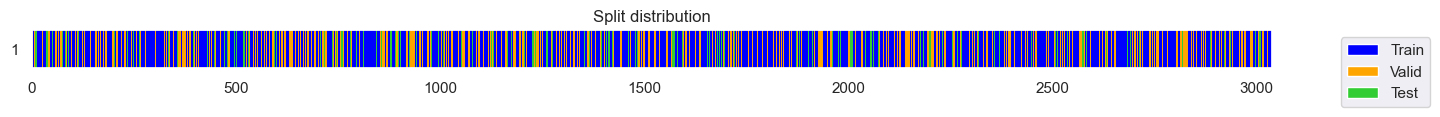

((#2984) [2268,513,358,30,1095,2123,2477,1124,1670,2956...],
 (#911) [696,207,1150,1348,1937,656,1371,2381,1174,546...],
 (#303) [1407,2673,2587,532,38,1815,1776,2971,746,1679...])

In [17]:
## train, test, validation splits to load into the model
splits = get_splits(
    y,
    n_splits=1,
    valid_size=0.3,
    test_size=0.1,
    shuffle=True,
    balance=True,
    stratify=True,
    random_state=42,
    show_plot=True,
    verbose=True,
)
splits

In [18]:
## dataset and loaders
tfms = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)

bs = 10
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[bs, bs * 2])

In [19]:
# set up architecture for model
arch, k = (RNNPlus, {"n_layers": 4, "bidirectional": True})
model = create_model(arch, dls=dls, **k)

In [20]:
# load pre-trained model into architecture
load_model("models/rnn_plus_haul_classifier.pth", model, opt=None, with_opt=False)

In [21]:
model

RNNPlus(
  (backbone): _RNN_Backbone(
    (to_cat_embed): Identity()
    (feature_extractor): Identity()
    (rnn): Sequential(
      (0): RNN(1, 100, num_layers=4, batch_first=True, bidirectional=True)
      (1): LSTMOutput()
    )
    (transpose): Transpose(dims=-1, -2).contiguous()
  )
  (head): Sequential(
    (0): LastStep()
    (1): Linear(in_features=200, out_features=2, bias=True)
  )
)

In [22]:
# use training data to create the learner
learner = Learner(dls, model, metrics=accuracy)

In [23]:
learner.load("rnn_plus_haul_classifier")

#### adding test dataset, get predictions

In [24]:
# adding new test dataset
valid_dl = dls.valid
test_ds = valid_dl.dataset.add_test(X_test, y_test)
test_dl = valid_dl.new(test_ds)

In [25]:
test3_ds = valid_dl.dataset.add_test(X_test3, y_test3)
test3_dl = valid_dl.new(test3_ds)

In [26]:
# get predictions for trip 2
_, temp_targets, temp_preds = learner.get_preds(
    dl=test_dl, with_decoded=True, save_preds=None, save_targs=None
)

# decode predictions
vocab = learner.dls.vocab
decoded_preds = vocab[temp_preds]

In [27]:
# get predictions for trip 3
_, temp_targets3, temp_preds3 = learner.get_preds(
    dl=test3_dl, with_decoded=True, save_preds=None, save_targs=None
)

# decode predictions
vocab = learner.dls.vocab
decoded_preds3 = vocab[temp_preds3]

In [153]:
# creating a df out of trip 2 predictions to join to the original trip 2 test data set
pre_dict = {"predictions": decoded_preds}
df_predict = pd.DataFrame(pre_dict)

df_results = pd.concat([df_test.reset_index(drop=True), df_predict.reset_index(drop=True)], axis=1)
df_results["utc_start_datetime"] = pd.to_datetime(df_results["utc_start_datetime"])
df_results["utc_end_datetime"] = df_results["utc_start_datetime"] + pd.Timedelta(minutes=5)
df_results["haul"] = df_results["is_haul"].map({1: "haul", 0: "no_haul"})
df_results["predict_haul"] = df_results["predictions"].map({"haul": 1, "no_haul": 0})

df_results.head()

,utc_start_datetime,weighted_count,detection_confidence,count,is_haul,id,rolling_weighted_count,rolling_count,predictions,utc_end_datetime,haul,predict_haul
0,2024-02-03 16:45:00,0.0,0.0,0.0,0,10181,0.0,0.0,no_haul,2024-02-03 16:50:00,no_haul,0
1,2024-02-03 16:50:00,0.0,0.0,0.0,0,10183,0.0,0.0,no_haul,2024-02-03 16:55:00,no_haul,0
2,2024-02-03 16:55:00,0.0,0.0,0.0,0,10185,0.0,0.0,no_haul,2024-02-03 17:00:00,no_haul,0
3,2024-02-03 17:05:00,0.0,0.0,0.0,0,10220,0.0,0.0,no_haul,2024-02-03 17:10:00,no_haul,0
4,2024-02-03 17:10:00,0.0,0.0,0.0,0,10221,0.0,0.0,no_haul,2024-02-03 17:15:00,no_haul,0


In [150]:
# creating a df out of trip 3 predictions to join to the original trip 3 test data set
pre_dict3 = {"predictions": decoded_preds3}
df_predict3 = pd.DataFrame(pre_dict3)

df_results3 = pd.concat(
    [df_test3.reset_index(drop=True), df_predict3.reset_index(drop=True)], axis=1
)
df_results3["utc_start_datetime"] = pd.to_datetime(df_results3["utc_start_datetime"])
df_results3["utc_end_datetime"] = df_results3["utc_start_datetime"] + pd.Timedelta(minutes=5)
df_results3["haul"] = df_results3["is_haul"].map({1: "haul", 0: "no_haul"})
df_results3["predict_haul"] = df_results3["predictions"].map({"haul": 1, "no_haul": 0})

df_results3.head()

,utc_start_datetime,weighted_count,detection_confidence,count,is_haul,id,rolling_weighted_count,rolling_count,predictions,utc_end_datetime,haul,predict_haul
0,2024-03-05 15:20:00,0.0,0.0,0.0,0,10181.0,0.0,0.0,no_haul,2024-03-05 15:25:00,no_haul,0
1,2024-03-05 15:25:00,0.0,0.0,0.0,0,10183.0,0.0,0.0,no_haul,2024-03-05 15:30:00,no_haul,0
2,2024-03-05 15:30:00,0.0,0.0,0.0,0,10185.0,0.0,0.0,no_haul,2024-03-05 15:35:00,no_haul,0
3,2024-03-05 15:35:00,0.0,0.0,0.0,0,10219.0,0.0,0.0,no_haul,2024-03-05 15:40:00,no_haul,0
4,2024-03-05 15:40:00,0.0,0.0,0.0,0,10220.0,0.0,0.0,no_haul,2024-03-05 15:45:00,no_haul,0


In [30]:
df_results.dtypes

utc_start_datetime        datetime64[ns]
weighted_count                   float64
detection_confidence             float64
count                            float64
is_haul                            int64
id                                 int64
rolling_weighted_count           float64
rolling_count                    float64
predictions                       object
utc_end_datetime          datetime64[ns]
haul                              object
predict_haul                       int64
dtype: object

## plot confusion matrix

In [32]:
# trip 2 interpretations and confusion matrix
interp2 = ClassificationInterpretation.from_learner(learner, dl=test_dl)
cm2 = interp2.confusion_matrix()

In [33]:
# trip 3 interpretations and confusion matrix
interp3 = ClassificationInterpretation.from_learner(learner, dl=test3_dl)
cm3 = interp3.confusion_matrix()

In [35]:
def get_metrics(cm):
    TP = cm[0][0]  # true positives
    FN = cm[0][1]  # false negatives
    FP = cm[1][0]  # false positives
    TN = cm[1][1]  # true negatives
    recall = TP / sum(cm[0])
    precision = TP / (TP + FP)
    accuracy = (TP + TN) / sum(sum(cm))

    print(f"recall: {recall} | precision: {precision} | accuracy: {accuracy}")

    return recall, precision, accuracy

In [36]:
recall2, precision2, accuracy2 = get_metrics(cm2)

recall: 0.70242656449553 | precision: 0.8076358296622613 | accuracy: 0.8726382085374388


In [37]:
recall3, precision3, accuracy3 = get_metrics(cm3)

recall: 0.4696969696969697 | precision: 0.8254437869822485 | accuracy: 0.8717860815906754


In [38]:
recall, precision, accuracy = get_metrics(cm2 + cm3)

recall: 0.6020334059549746 | precision: 0.8135426889106968 | accuracy: 0.8722077922077922


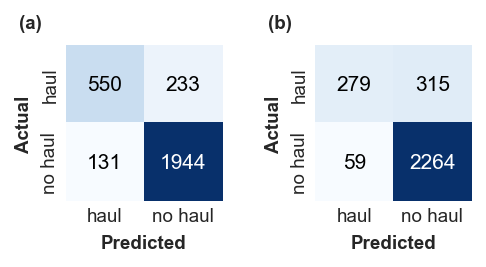

In [39]:
plt.rc("axes", labelsize=9)
fig, ax = plt.subplots(1, 2, figsize=(3.6, 1.8), dpi=150)
plt.tight_layout()

plt.subplots_adjust(wspace=0.6)  # Increase the width padding between subplots
cm_dict = {"a": {"cm": cm2, "interp": interp2}, "b": {"cm": cm3, "interp": interp3}}

for i, (label, cm) in enumerate(cm_dict.items()):
    plot_confusion_matrix(cm["cm"], ax[i], cm["interp"], "confusion matrix")
    # plot_confusion_matrix(cm3, ax[i], interp3, 'confusion matrix')
    ax[i].tick_params(axis="x", labelsize=9)  # Change x ticks font size to 12
    ax[i].tick_params(axis="y", labelsize=9, left=False)  # Change y ticks font size to 12

    ax[i].text(
        -0.3,
        1.2,
        f"({label})",
        transform=ax[i].transAxes,
        fontsize=9,
        fontweight="bold",
        va="top",
        ha="left",
    )


# ax[1].tick_params(axis='x', labelsize=12)  # Change x ticks font size to 12
# ax[1].tick_params(axis='y', labelsize=12, left = False)  # Change y ticks font size to 12
sns.despine(trim=True, left=True, bottom=True)


plt.savefig("chart_pngs/confusion_matrix2.png", bbox_inches="tight")

## haul prediction plots

#### helper functions

In [103]:
def plot_event_bars(
    df,
    ax,
    label,
    datetime_col,
    duration=None,
    end_col=None,
    duration_col=None,
    y_val=0.7,
    y_height=0.6,
    color="#43aa99",
):
    if duration:
        x_duration = np.full(len(df), pd.Timedelta(duration))
    elif end_col:
        df["duration"] = df[end_col] - df[datetime_col]
        x_duration = df["duration"]
    elif duration_col:
        x_duration = df[duration_col]

    x = list(zip(df[datetime_col], x_duration))
    y = (y_val, y_height)

    plot = ax.broken_barh(x, y, facecolors=color, edgecolor="face", label=label, clip_on=False)

    return plot


In [56]:
# def plot_event_vspan(df_events, ax, color_dict):
#     for category, color in color_dict.items():
#         df_category = df_events.loc[df_events['category']==category]

#         for idx, row in df_category.iterrows():
#             ax.axvspan(*mdates.date2num([row['start_time'], row['end_time']]), color=color, edgecolor = 'face',alpha=0.5)

In [66]:
def plot_set_vspan(df_sets, ax, color="#a2c662"):
    for idx, row in df_sets.iterrows():
        ax.axvspan(
            *mdates.date2num([row["haul_start_datetime"], row["haul_end_datetime"]]),
            color=color,
            edgecolor="#40a018",
            alpha=0.5,
        )


def get_video_times(vessel, trip_info):
    trip_start_date = trip_info["trip_start_date"]
    trip_end_date = trip_info["trip_end_date"]

    sql = f"""
         SELECT
            v.start_datetime,
            v.cam_name

            from {vessel}_v1_video_files v
            where start_datetime > '{trip_start_date}' and start_datetime < '{trip_end_date}'
    """
    video_df = wr.athena.read_sql_query(sql, database="tnc_edge")
    video_df.start_datetime = pd.to_datetime(video_df.start_datetime)
    video_df["utc_start_datetime"] = video_df["start_datetime"].dt.tz_convert(None)
    # video_df['utc_end_datetime'] = video_df['utc_start_datetime'] + pd.Timedelta(minutes = 5)
    return video_df

In [58]:
# def annotate_notes(ax, df, text_col, text_xy = (-60, 30)):
#     arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=.2", color = 'black')
#     y_var = 20
#     annots = []
#     bbox_args = dict(boxstyle='round', facecolor='black', alpha=0.35)
#     for idx, row in df.iterrows():
#         # y_var = x_vars[n]
#         text = row[text_col]
#         data_xy = (row['start_time'], 1.7)

#         an = ax.annotate(
#             text,
#             xy=data_xy, xycoords='data',
#             xytext=text_xy, textcoords='offset points',
#             arrowprops=arrowprops,
#             bbox = bbox_args,
#             color = 'white'
#         )

#         annots.append(an)

#         x, y = text_xy

#         y = y+y_var
#         y_var = y_var * -1

#         text_xy = (x,y)

#     return annots

### haul predictions plot for trip 2 and trip 3

In [40]:
sns.set_style("whitegrid", {"axes.grid": False})

In [41]:
ai_countsBrancol2 = Brancol2data["ai_sets"]

In [42]:
bvCounts_Brancol2 = Brancol2data["all_counts"]

In [43]:
colors

[(0.09411764705882353, 0.3058823529411765, 0.6784313725490196),
 (0.39215686274509803, 0.5607843137254902, 1.0),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.6823529411764706, 0.6196078431372549, 0.9686274509803922),
 (0.40784313725490196, 0.26666666666666666, 0.8352941176470589),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.7725490196078432, 0.17647058823529413, 0.6745098039215687),
 (0.9372549019607843, 0.2627450980392157, 0.2549019607843137),
 (0.5176470588235295, 0.08627450980392157, 0.2980392156862745),
 (0.796078431372549, 0.396078431372549, 0.4666666666666667),
 (1.0, 0.3803921568627451, 0.0),
 (0.5647058823529412, 0.3333333333333333, 0.058823529411764705),
 (0.7803921568627451, 0.5529411764705883, 0.10588235294117647),
 (1.0, 0.6901960784313725, 0.011764705882352941),
 (0.8666666666666667, 0.8, 0.4666666666666667),
 (0.6352941176470588, 0.7764705882352941, 0.3843137254901961),
 (0.25098039215686274, 0.6274509803921569, 0.09411764705882353),
 (0.06666666666666667, 0.45098039215686275, 0.2784313725490196),
 (0.2627450980392157, 0.6666666666666666, 0.6)]

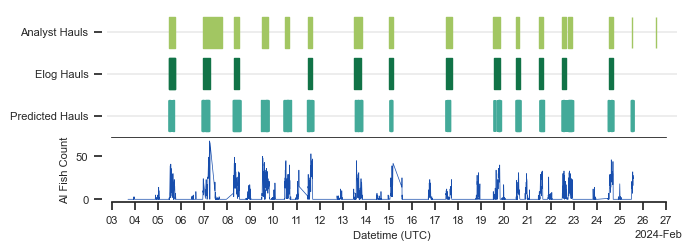

In [104]:
# Trip 2 predictions plot

# setting style, font sizes, and fig size
sns.set_style("whitegrid", {"axes.grid": False})
sns.set_theme(style="ticks")
figsize = (7.5, 2.5)

plt.rc("xtick", labelsize=8)
plt.rc("ytick", labelsize=8)
plt.rc("axes", labelsize=8)

# set up datasets to be used
bv_sets = brancol2_bv_sets
elog = brancol2_elog
results = df_results


# define hex codes for colors used
bv_color = "#a2c662"
ai_color = "#184EAD"
elog_color = "#117347"
predictions_color = "#43aa99"


fig, ax = plt.subplots(2, 1, figsize=figsize, gridspec_kw={"height_ratios": [2, 1]}, sharex=True)

# hlines for the event bars (the horizonal lines)
yticks = [0.175, 0.5, 0.825]
yheight = 0.24
ypos = [tick - (yheight / 2) for tick in yticks]
ax[0].hlines(
    [0.175, 0.5, 0.825], 0.01, 0.99, transform=ax[0].transAxes, colors="grey", lw=0.2, zorder=0
)

# ticks for the event bar positions and labels
ax[0].set_yticks([0.175, 0.5, 0.825], ("Predicted Hauls", "Elog Hauls", "Analyst Hauls"))
ax[0].set_ylim([0, 1])


# plotting event bars
plot_event_bars(
    bv_sets,
    ax[0],
    "Analyst Hauls",
    "haul_start_datetime",
    end_col="haul_end_datetime",
    y_val=ypos[2],
    y_height=yheight,
    color=bv_color,
)  # y_val = .675,
plot_event_bars(
    elog,
    ax[0],
    "elog_hauls",
    "systemstarthauldatetime",
    end_col="systemendhauldatetime",
    color=elog_color,
    y_val=ypos[1],
    y_height=yheight,
)  # y_val = .35
plot_event_bars(
    results.loc[results.predict_haul == 1],
    ax[0],
    "predicted_hauls",
    "utc_start_datetime",
    duration="5m",
    y_val=ypos[0],
    y_height=yheight,
    color=predictions_color,
)  # y_val = .025


# plotting the ai counts
ln1 = sns.lineplot(
    x="utc_start_datetime",
    y="count",
    data=results,
    ax=ax[1],
    label="AI Counts",
    color=ai_color,
    clip_on=False,
    lw=0.5,
)


# formatting x axis dates
locator = DayLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax[1].xaxis.set_major_locator(locator)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel("Datetime (UTC)")

# labeling y axis for fish counts
ax[1].set_ylabel("AI Fish Count")


# creating custom legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# set xlimits for the plot based on the top plot
x0, x1 = ax[0].get_xlim()
ax[0].set_xlim(x0, x1)

# remove legend
ax[1].get_legend().remove()

# adjust white space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# remove spines
sns.despine(trim=True, left=True)
plt.savefig("../chart_pngs/haul_detection2_report.png", bbox_inches="tight", dpi=150)

plt.show()

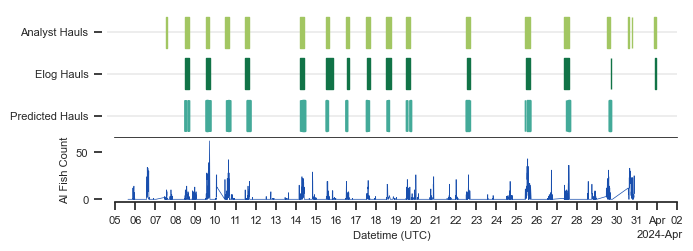

In [105]:
# Trip 3 predictions plot

# setting style, font sizes, and fig size
sns.set_style("whitegrid", {"axes.grid": False})
sns.set_theme(style="ticks")
figsize = (7.5, 2.5)

plt.rc("xtick", labelsize=8)
plt.rc("ytick", labelsize=8)
plt.rc("axes", labelsize=8)

# set up datasets to be used
bv_sets = brancol3_bv_sets
elog = brancol3_elog
results = df_results3


# define hex codes for colors used
bv_color = "#a2c662"
ai_color = "#184EAD"
elog_color = "#117347"
predictions_color = "#43aa99"


fig, ax = plt.subplots(2, 1, figsize=figsize, gridspec_kw={"height_ratios": [2, 1]}, sharex=True)

# hlines for the event bars (the horizonal lines)
yticks = [0.175, 0.5, 0.825]
yheight = 0.24
ypos = [tick - (yheight / 2) for tick in yticks]
ax[0].hlines(
    [0.175, 0.5, 0.825], 0.01, 0.99, transform=ax[0].transAxes, colors="grey", lw=0.2, zorder=0
)

# ticks for the event bar positions and labels
ax[0].set_yticks([0.175, 0.5, 0.825], ("Predicted Hauls", "Elog Hauls", "Analyst Hauls"))
ax[0].set_ylim([0, 1])


# plotting event bars
plot_event_bars(
    bv_sets,
    ax[0],
    "Analyst Hauls",
    "haul_start_datetime",
    end_col="haul_end_datetime",
    y_val=ypos[2],
    y_height=yheight,
    color=bv_color,
)  # y_val = .675,
plot_event_bars(
    elog,
    ax[0],
    "elog_hauls",
    "systemstarthauldatetime",
    end_col="systemendhauldatetime",
    color=elog_color,
    y_val=ypos[1],
    y_height=yheight,
)  # y_val = .35
plot_event_bars(
    results.loc[results.predict_haul == 1],
    ax[0],
    "predicted_hauls",
    "utc_start_datetime",
    duration="5m",
    y_val=ypos[0],
    y_height=yheight,
    color=predictions_color,
)  # y_val = .025


# plotting the ai counts
ln1 = sns.lineplot(
    x="utc_start_datetime",
    y="count",
    data=results,
    ax=ax[1],
    label="AI Counts",
    color=ai_color,
    clip_on=False,
    lw=0.5,
)


# formatting x axis dates
locator = DayLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax[1].xaxis.set_major_locator(locator)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel("Datetime (UTC)")

# labeling y axis for fish counts
ax[1].set_ylabel("AI Fish Count")


# creating custom legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# set xlimits for the plot based on the top plot
x0, x1 = ax[0].get_xlim()
ax[0].set_xlim(x0, x1)

# remove legend
ax[1].get_legend().remove()

# adjust white space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# remove spines
sns.despine(trim=True, left=True)
plt.savefig("../chart_pngs/haul_detection3_report.png", bbox_inches="tight", dpi=150)

plt.show()

# Key Events from Reviewer Notes

##### helper functions

In [106]:
# def plot_event_bars(df, ax,label, datetime_col,duration=None,end_col = None, duration_col = None, y_val=.7, y_height = .6, color= '#43aa99' , alpha = 1):

#     if duration:
#         x_duration = np.full(len(df), pd.Timedelta(duration))
#     elif end_col:
#         df['duration'] =  df[end_col]- df[datetime_col]
#         x_duration = df['duration']
#     elif duration_col:
#         x_duration = df[duration_col]
#     else:
#         x_duration = np.full(len(df), 2)

#     x = list(zip(df[datetime_col], x_duration))
#     y = (y_val, y_height)

#     plot = ax.broken_barh(x, y, facecolors = color, edgecolor = 'face', label = label, clip_on=True, alpha = alpha)

#     return plot


In [84]:
def plot_event_category_bars(df_events, ax, category_color_dict, y_val_start, y_height):
    n = len(category_color_dict)
    y_vals = create_array(n, y_val_start, y_height)
    for idx, (category, color) in enumerate(category_color_dict.items()):
        df_category = df_events.loc[df_events["category"] == category].copy()
        y_val = y_vals[idx] - (y_height / 2)

        plot_event_bars(
            df_category,
            ax,
            category,
            "start_time",
            end_col="end_time",
            y_val=y_val,
            y_height=y_height,
            color=color,
        )

In [70]:
def create_array(n, start_val, step_val):
    # Calculate the end value based on the number of steps, start value, and step value
    end_val = start_val + step_val * (n - 1)
    return np.linspace(start_val, end_val, n)

### Plotting Events

##### reading data

In [ ]:
df_notes = pd.read_csv("../data/reviewer_notes_6-20.csv")
# df_notes = pd.read_csv('../data/reviewer_notes.csv')
df_notes["start_time"] = pd.to_datetime(df_notes["start_time"], format="mixed")

df_notes["end_time"] = pd.to_datetime(df_notes["end_time"], format="mixed")

df_notes["category"].value_counts()

In [55]:
eventsBrancol2 = df_notes.loc[(df_notes["vessel"] == "Brancol") & (df_notes["trip_number"] == 2)]
eventsBrancol3 = df_notes.loc[(df_notes["vessel"] == "Brancol") & (df_notes["trip_number"] == 3)]

In [56]:
eventsBrancol2["category"].value_counts()

category
Haul Stop         37
No Video           7
Camera Blocked     6
Other Gear         4
Abnormal Catch     3
No Elog            3
Abnormal Haul      1
Name: count, dtype: int64

In [89]:
eventsBrancol2.head()

,vessel,trip_number,set_number,set_id,date,observation,category,start_time,end_time,duration
41,Brancol,2.0,0.0,NaN,2/3/2024,Beginning of camera 2 at 4:46pm (03/02).,NaN,2024-02-03 16:46:00,NaT,NaN
42,Brancol,2.0,0.0,NaN,2/3/2024,Beginning of camera 1 at 4:50pm (03/02),NaN,2024-02-03 16:50:00,NaT,NaN
43,Brancol,2.0,1.0,brancol_2024-02-03_set_01,2/5/2024,Hauling stoped between 01:24pm and 1:54pm (filling the hold of part of the catch).,Haul Stop,2024-02-05 13:24:00,2024-02-05 13:54:00,0:30:00
44,Brancol,2.0,2.0,brancol_2024-02-03_set_02,2/6/2024,No video fron 11:28 pm (06/02) to 01:15am (07/02) during hauling.,No Video,2024-02-06 23:28:00,2024-02-07 01:15:00,NaN
46,Brancol,2.0,2.0,brancol_2024-02-03_set_02,2/7/2024,Break in the hauling between 02:40 am and 03:31 am for a break and puting aside the fish.,Haul Stop,2024-02-07 02:40:00,2024-02-07 03:31:00,0:51:00


#### all events 

In [86]:
# create dictionary of colors for each category
category_dict = {
    "Haul Stop": colors[13],
    "Camera Blocked": colors[10],
    "No Video": colors[6],
    "Abnormal Catch": colors[8],
}

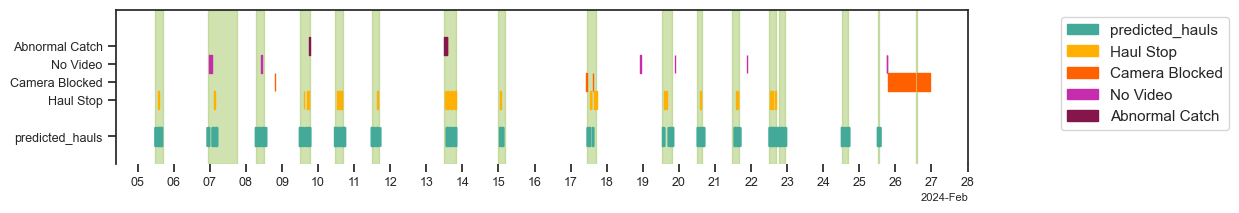

In [106]:
eventsBrancol2_notna = eventsBrancol2[eventsBrancol2["end_time"].notna()]


# df_test.reset_index(inplace = True)
bbox_args = dict(boxstyle="round", facecolor="black", alpha=0.35)
# plt.subplots_adjust(wspace=0, hspace=-.2)
# bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
# plt.tight_layout()
fig, ax = plt.subplots(
    1,
    1,
    figsize=(11, 2),
    sharex=True,
    # , gridspec_kw={'height_ratios': [2, 1]},
)

# trip2 = Brancol2data['trip_info']
plot_set_vspan(brancol2_bv_sets, ax)

plot_event_bars(
    df_results.loc[df_results.predict_haul == 1],
    ax,
    "predicted_hauls",
    "utc_start_datetime",
    duration="5m",
    y_val=0.95,
    y_height=0.1,
)
plot_event_category_bars(eventsBrancol2_notna, ax, category_dict, 1.2, 0.1)


n = len(category_dict)
y_vals = [0, 1.0] + list(create_array(n, 1.2, 0.1))
y_labels = ["", "predicted_hauls"] + list(category_dict.keys())

ax.set_yticks(y_vals, y_labels)
ax.set_ylim([0.85, max(y_vals) + 0.2])
# ax[1].set_ylim([0, 50])
locator = DayLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.tick_params(axis="both", labelsize=9)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.spines["bottom"].set_visible(False)
# ax[1].spines['top'].set_visible(False)
ax.legend()

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor="#a2c662", edgecolor="#40a018", alpha=0.4, label="BV Hauls"),
    Patch(facecolor="#117347", edgecolor="#117347", label="Elog Hauls"),
    Patch(facecolor="#43aa99", edgecolor="#43aa99", label="Predicted Hauls"),
    Line2D([0], [0], color="#184EAD", lw=2, label="AI Counts"),
]

# ax[0].legend(handles=legend_elements, loc='upper left', fontsize = 9)
# ax[1].get_legend().remove()

plt.legend(bbox_to_anchor=(1.1, 1))

plt.subplots_adjust(wspace=0, hspace=-0.2)

plt.savefig("../chart_pngs/reivewer_events_haul_detection.png")
plt.show()

In [113]:
# n = len(category_dict.keys())

#### no video events

In [93]:
video_events = df_notes.loc[
    (df_notes["category"] == "No Video") | (df_notes["category"] == "Camera Blocked")
]

video_eventsBrancol2 = video_events.loc[
    (video_events["vessel"] == "Brancol") & (video_events["trip_number"] == 2)
]

#### haul stop events

In [94]:
haul_stops = df_notes.loc[
    (df_notes["category"] == "Haul Stop") | (df_notes["category"] == "Gear Issue")
]

haul_stops.dtypes

haul_stopsBrancol2 = haul_stops.loc[
    (haul_stops["vessel"] == "Brancol") & (haul_stops["trip_number"] == 2)
]

In [95]:
haul_stopsBrancol2.head()

,vessel,trip_number,set_number,set_id,date,observation,category,start_time,end_time,duration
43,Brancol,2.0,1.0,brancol_2024-02-03_set_01,2/5/2024,Hauling stoped between 01:24pm and 1:54pm (filling the hold of part of the catch).,Haul Stop,2024-02-05 13:24:00,2024-02-05 13:54:00,0:30:00
46,Brancol,2.0,2.0,brancol_2024-02-03_set_02,2/7/2024,Break in the hauling between 02:40 am and 03:31 am for a break and puting aside the fish.,Haul Stop,2024-02-07 02:40:00,2024-02-07 03:31:00,0:51:00
52,Brancol,2.0,4.0,brancol_2024-02-03_set_04,2/9/2024,Hauling stoped between 02:38pm and 02:40pm,Haul Stop,2024-02-09 14:38:00,2024-02-09 14:40:00,0:02:00
53,Brancol,2.0,4.0,brancol_2024-02-03_set_04,2/9/2024,Hauling also stopped between 04:37pm and 05:09pm because of knots,Haul Stop,2024-02-09 16:37:00,2024-02-09 17:09:00,0:32:00
54,Brancol,2.0,4.0,brancol_2024-02-03_set_04,2/9/2024,Hauling also stopped between 05:31pm and 05:53pm because of knots,Haul Stop,2024-02-09 17:31:00,2024-02-09 17:53:00,0:22:00


In [98]:
df_results.head()

,utc_start_datetime,weighted_count,detection_confidence,count,is_haul,id,rolling_weighted_count,rolling_count,predictions,utc_end_datetime,haul,predict_haul,set_number
0,2024-02-03 16:45:00,0.0,0.0,0.0,0,10181,0.0,0.0,no_haul,2024-02-03 16:50:00,no_haul,0,None
1,2024-02-03 16:50:00,0.0,0.0,0.0,0,10183,0.0,0.0,no_haul,2024-02-03 16:55:00,no_haul,0,None
2,2024-02-03 16:55:00,0.0,0.0,0.0,0,10185,0.0,0.0,no_haul,2024-02-03 17:00:00,no_haul,0,None
3,2024-02-03 17:05:00,0.0,0.0,0.0,0,10220,0.0,0.0,no_haul,2024-02-03 17:10:00,no_haul,0,None
4,2024-02-03 17:10:00,0.0,0.0,0.0,0,10221,0.0,0.0,no_haul,2024-02-03 17:15:00,no_haul,0,None


In [154]:
# create dataframe that joins the hauls from bv sets to the predicted hauls (df_results) to get the set number for trip 2
conn = sqlite3.connect(":memory:")
bv_sets = Brancol2data["bv_sets"]
df_hauls = bv_sets.loc[:, ["set_number", "haul_start_datetime", "haul_end_datetime"]]

# write the tables
df_results.to_sql("results", conn, index=False)
df_hauls.to_sql("hauls", conn, index=False)

query = """
select
results.*,
hauls.set_number

from results
left join hauls on results.utc_start_datetime between hauls.haul_start_datetime and hauls.haul_end_datetime

"""
df_results_setnumber = pd.read_sql_query(query, conn)
df_results_setnumber["utc_end_datetime"] = pd.to_datetime(df_results_setnumber["utc_end_datetime"])
df_results_setnumber["utc_start_datetime"] = pd.to_datetime(
    df_results_setnumber["utc_start_datetime"]
)

In [151]:
df_results3.head()

,utc_start_datetime,weighted_count,detection_confidence,count,is_haul,id,rolling_weighted_count,rolling_count,predictions,utc_end_datetime,haul,predict_haul
0,2024-03-05 15:20:00,0.0,0.0,0.0,0,10181.0,0.0,0.0,no_haul,2024-03-05 15:25:00,no_haul,0
1,2024-03-05 15:25:00,0.0,0.0,0.0,0,10183.0,0.0,0.0,no_haul,2024-03-05 15:30:00,no_haul,0
2,2024-03-05 15:30:00,0.0,0.0,0.0,0,10185.0,0.0,0.0,no_haul,2024-03-05 15:35:00,no_haul,0
3,2024-03-05 15:35:00,0.0,0.0,0.0,0,10219.0,0.0,0.0,no_haul,2024-03-05 15:40:00,no_haul,0
4,2024-03-05 15:40:00,0.0,0.0,0.0,0,10220.0,0.0,0.0,no_haul,2024-03-05 15:45:00,no_haul,0


In [155]:
# create dataframe that joins the hauls from bv sets to the predicted hauls (df_results) to get the set number for trip 3
conn = sqlite3.connect(":memory:")
bv_sets3 = Brancol3data["bv_sets"]
df_hauls3 = bv_sets3.loc[:, ["set_number", "haul_start_datetime", "haul_end_datetime"]]

# write the tables
df_results3.to_sql("results", conn, index=False)
df_hauls3.to_sql("hauls", conn, index=False)

query = """
select
results.*,
hauls.set_number

from results
left join hauls on results.utc_start_datetime between hauls.haul_start_datetime and hauls.haul_end_datetime

"""
df_results3_setnumber = pd.read_sql_query(query, conn)
df_results3_setnumber["utc_end_datetime"] = pd.to_datetime(
    df_results3_setnumber["utc_end_datetime"]
)
df_results3_setnumber["utc_start_datetime"] = pd.to_datetime(
    df_results3_setnumber["utc_start_datetime"]
)

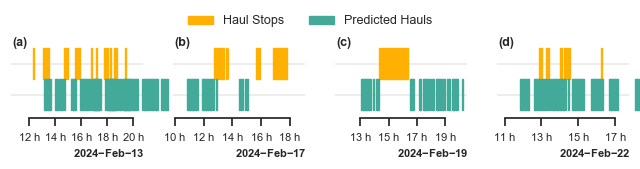

In [156]:
# plot sets of interest for trip 2
interest_sets = [7, 9, 10, 13]

results = df_results_setnumber

%matplotlib inline
# %matplotlib widget
fig, axes = plt.subplots(1, 4, figsize=(8, 1), sharey=True)
label = "haul stops"
chart_labels = ["a", "b", "c", "d"]

df_hauls = results.loc[results.predict_haul == 1]

# hlines for the event bars
yticks = [0.175, 0.5, 0.825]
yticks = [0.3, 0.7, 1.825]
yheight = 0.4
ypos = [tick - (yheight / 2) for tick in yticks]

for i, set_n in enumerate(interest_sets):
    ax = axes[i]
    ax.hlines(yticks, 0.01, 0.99, transform=ax.transAxes, colors="grey", lw=0.2, zorder=0)
    # ticks for the event bar positions and labels
    ytick_labels = ["Predicted Hauls", "Haul Stops", "Analyst Hauls"]
    ax.set_yticks(yticks, ytick_labels)
    ax.set_yticklabels([])
    ax.set_ylim([0, 1])

    # plotting event bars
    p1 = plot_event_bars(
        brancol2_bv_sets.loc[brancol2_bv_sets["set_number"].astype(int) == set_n].copy(),
        ax,
        ytick_labels[2],
        "haul_start_datetime",
        end_col="haul_end_datetime",
        y_val=ypos[2],
        y_height=yheight,
        color=bv_color,
    )
    p2 = plot_event_bars(
        haul_stopsBrancol2.loc[haul_stopsBrancol2["set_number"] == set_n].copy(),
        ax,
        ytick_labels[1],
        "start_time",
        end_col="end_time",
        y_val=ypos[1],
        y_height=yheight,
        color=colors[13],
    )
    xlim = p1.axes.get_xlim()
    p3 = plot_event_bars(
        df_hauls,
        ax,
        ytick_labels[0],
        "utc_start_datetime",
        duration="5m",
        y_val=ypos[0],
        y_height=yheight,
    )

    xmin = pd.Timestamp(xlim[0], unit="D") - pd.Timedelta("1h")
    xmax = pd.Timestamp(xlim[1], unit="D") + pd.Timedelta("1h")
    ax.set_xlim(xmin, xmax)
    # p3.axes.set_xlim(xlim)

    locator = DayLocator(bymonthday=1)
    hour_locator = HourLocator(interval=2)
    # formatter = mdates.ConciseDateFormatter(locator)
    hour_formatter = mdates.ConciseDateFormatter(
        hour_locator,
        formats=["%Y", "%b", "%d", "%H h", "%H:%M", "%S.%f"],
        offset_formats=["", "%Y", "%Y-%b", "%Y-%b-%d", "%Y-%b-%d", "%Y-%b-%d %H:%M"],
        usetex=True,
    )
    fmt = "%H h"

    ax.xaxis.set_major_locator(hour_locator)
    ax.xaxis.set_major_formatter(hour_formatter)
    ax.xaxis.get_offset_text().set_fontweight("bold")
    ax.tick_params(axis="y", length=0)
    sns.despine(trim=True, left=True)

    ax.text(
        0.02,
        1.05,
        f"({chart_labels[i]})",
        transform=ax.transAxes,
        fontsize=9,
        fontweight="bold",
        va="top",
        ha="left",
    )

handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles[1:],
    labels[1:],
    loc="upper center",
    fontsize=9,
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    frameon=False,
)

# Adding bolded labels to the top left corner of each subplot

plt.savefig("haulstop_subsets.png", bbox_inches="tight")


### category correlations

##### joining events to ai

In [157]:
df_results.head()

,utc_start_datetime,weighted_count,detection_confidence,count,is_haul,id,rolling_weighted_count,rolling_count,predictions,utc_end_datetime,haul,predict_haul
0,2024-02-03 16:45:00,0.0,0.0,0.0,0,10181,0.0,0.0,no_haul,2024-02-03 16:50:00,no_haul,0
1,2024-02-03 16:50:00,0.0,0.0,0.0,0,10183,0.0,0.0,no_haul,2024-02-03 16:55:00,no_haul,0
2,2024-02-03 16:55:00,0.0,0.0,0.0,0,10185,0.0,0.0,no_haul,2024-02-03 17:00:00,no_haul,0
3,2024-02-03 17:05:00,0.0,0.0,0.0,0,10220,0.0,0.0,no_haul,2024-02-03 17:10:00,no_haul,0
4,2024-02-03 17:10:00,0.0,0.0,0.0,0,10221,0.0,0.0,no_haul,2024-02-03 17:15:00,no_haul,0


In [109]:
categories = eventsBrancol2["category"].unique()

# categories = np.delete(categories, -1)


In [110]:
categories

array([nan, 'Haul Stop', 'No Video', 'Camera Blocked', 'Abnormal Catch',
       'Abnormal Haul', 'Other Gear', 'No Elog'], dtype=object)

In [111]:
categories = [category for category in categories if str(category) != "nan"]

In [112]:
df_results = df_results.loc[:, ~df_results.columns.duplicated()]
# df_results.head()

In [158]:
# joining df_results with each category from eventsBrancol2
df_events = eventsBrancol2.copy()
df_category_results = df_results_setnumber.copy()
# iterate through each category
select_columns = df_results.columns.to_list()
select_columns = ["results." + x for x in select_columns]
for category in categories:
    # create a category df
    df_category = df_events.loc[df_events["category"] == category].copy()
    df_category = df_category.loc[:, ["start_time", "end_time", "category", "set_number"]]

    column_label = "is_" + "_".join(category.lower().split(" "))

    # Make the db in memory
    conn = sqlite3.connect(":memory:")
    # write the tables
    df_category_results.to_sql("results", conn, index=False)
    df_category.to_sql("category", conn, index=False)

    query = f"""
        select
        {', '.join(select_columns)},
        category.category is not null as {column_label}

        from results
        left join category on
        results.utc_start_datetime between category.start_time and category.end_time or
        category.start_time between results.utc_start_datetime and results.utc_end_datetime
        """

    df_category_results = pd.read_sql_query(query, conn)
    select_columns.append(column_label)


if "set_number" not in df_category_results.columns.to_list():
    conn = sqlite3.connect(":memory:")
    bv_sets = Brancol2data["bv_sets"]
    df_hauls = bv_sets.loc[:, ["set_number", "haul_start_datetime", "haul_end_datetime"]]

    # write the tables to add set_number
    df_category_results.to_sql("results", conn, index=False)
    df_hauls.to_sql("hauls", conn, index=False)

    query = """
    select
    results.*,
    hauls.set_number

    from results
    left join hauls on results.utc_start_datetime between hauls.haul_start_datetime and hauls.haul_end_datetime

    """
    df_category_results = pd.read_sql_query(query, conn)


In [159]:
# looking for correlations with the no_haul predictions
df_category_only_hauls["predict_no_haul"] = df_category_only_hauls["predict_haul"].map({0: 1, 1: 0})


df_category_only_hauls.corr()["predict_no_haul"]

predict_haul        -1.000000
is_haul_stop         0.028101
is_no_video         -0.032885
is_no_elog                NaN
is_camera_blocked   -0.023238
is_abnormal_catch    0.073607
is_abnormal_haul     0.060077
is_other_gear       -0.156373
video_haul_stop      0.021326
predict_no_haul      1.000000
Name: predict_no_haul, dtype: float64

### finding over lap between no_haul predictions and haul stops

In [161]:
## for trip 2
df_events = eventsBrancol2.copy()
df_haul_stop_results = df_results_setnumber.copy()


# get a list of the results columns to use for the sql select statement
select_columns = df_results_setnumber.columns.to_list()
select_columns = ["results." + x for x in select_columns]

# creating a df of only HaulStop events
category = "Haul Stop"
dfHaulStop = df_events.loc[df_events["category"] == category].copy()
dfHaulStop = dfHaulStop.loc[:, ["start_time", "end_time", "category", "set_number"]]
dfHaulStop = dfHaulStop.reset_index().rename(columns={"index": "haul_stop_id"})

column_label = "is_" + "_".join(category.lower().split(" "))

# Make the db in memory
conn = sqlite3.connect(":memory:")
# write the tables
df_haul_stop_results.to_sql("results", conn, index=False)
dfHaulStop.to_sql("category", conn, index=False)

# sql query to join haul stop events to the results if the prediction window is between the haul stop start/end or if the haul stop start time is between the prediction window
query = f"""
    select
    {', '.join(select_columns)},
    category.category is not null as {column_label},
    category.haul_stop_id,
    category.start_time as haul_stop_start,
    category.end_time as haul_stop_end

    from results
    left join category on
        results.utc_start_datetime between category.start_time and category.end_time or
        category.start_time between results.utc_start_datetime and results.utc_end_datetime
    """

df_haul_stop_results = pd.read_sql_query(query, conn)
# setting up a column of predict_no_haul that is opposite of predict_haul
df_haul_stop_results["predict_no_haul"] = df_haul_stop_results["predict_haul"].map({0: 1, 1: 0})
df_haul_stop_results = df_haul_stop_results.loc[df_haul_stop_results["is_haul"] == 1]
df_haul_stop_results = df_haul_stop_results[
    [
        "utc_start_datetime",
        "utc_end_datetime",
        "is_haul",
        "predict_haul",
        "predict_no_haul",
        "set_number",
        "is_haul_stop",
        "haul_stop_id",
        "haul_stop_start",
        "haul_stop_end",
    ]
]

# converting columns to datetime
df_haul_stop_results["utc_end_datetime"] = pd.to_datetime(df_haul_stop_results["utc_end_datetime"])
df_haul_stop_results["utc_start_datetime"] = pd.to_datetime(
    df_haul_stop_results["utc_start_datetime"]
)
df_haul_stop_results["haul_stop_end"] = pd.to_datetime(df_haul_stop_results["haul_stop_end"])
df_haul_stop_results["haul_stop_start"] = pd.to_datetime(df_haul_stop_results["haul_stop_start"])
dfHaulStop["end_time"] = pd.to_datetime(dfHaulStop["end_time"])
dfHaulStop["start_time"] = pd.to_datetime(dfHaulStop["start_time"])

In [ ]:
## for trip 3
df_events3 = eventsBrancol3.copy()
df_haul_stop_results3 = df_results3_setnumber.copy()
# iterate through each category
select_columns = df_results3_setnumber.columns.to_list()


select_columns = ["results." + x for x in select_columns]

category = "Haul Stop"
dfHaulStop3 = df_events3.loc[df_events3["category"] == category].copy()
dfHaulStop3 = dfHaulStop3.loc[:, ["start_time", "end_time", "category", "set_number"]]
dfHaulStop3 = dfHaulStop3.reset_index().rename(columns={"index": "haul_stop_id"})

column_label = "is_" + "_".join(category.lower().split(" "))

# Make the db in memory
conn = sqlite3.connect(":memory:")
# write the tables
df_haul_stop_results3.to_sql("results", conn, index=False)
dfHaulStop3.to_sql("category", conn, index=False)


query = f"""
    select
    {', '.join(select_columns)},
    category.category is not null as {column_label},
    category.haul_stop_id,
    category.start_time as haul_stop_start,
    category.end_time as haul_stop_end

    from results
    left join category on
        results.utc_start_datetime between category.start_time and category.end_time or
        category.start_time between results.utc_start_datetime and results.utc_end_datetime
    """

print(query)

df_haul_stop_results3 = pd.read_sql_query(query, conn)
df_haul_stop_results3["predict_no_haul"] = df_haul_stop_results3["predict_haul"].map({0: 1, 1: 0})
df_haul_stop_results3 = df_haul_stop_results3.loc[df_haul_stop_results3["is_haul"] == 1]
df_haul_stop_results3 = df_haul_stop_results3[
    [
        "utc_start_datetime",
        "utc_end_datetime",
        "is_haul",
        "predict_haul",
        "predict_no_haul",
        "set_number",
        "is_haul_stop",
        "haul_stop_id",
        "haul_stop_start",
        "haul_stop_end",
    ]
]

df_haul_stop_results3["utc_end_datetime"] = pd.to_datetime(
    df_haul_stop_results3["utc_end_datetime"]
)
df_haul_stop_results3["utc_start_datetime"] = pd.to_datetime(
    df_haul_stop_results3["utc_start_datetime"]
)

df_haul_stop_results3["haul_stop_end"] = pd.to_datetime(df_haul_stop_results3["haul_stop_end"])
df_haul_stop_results3["haul_stop_start"] = pd.to_datetime(df_haul_stop_results3["haul_stop_start"])

dfHaulStop3["end_time"] = pd.to_datetime(dfHaulStop3["end_time"])
dfHaulStop3["start_time"] = pd.to_datetime(dfHaulStop3["start_time"])

In [165]:
# get the total number of minutes of haul events recorded by bv for trip 3
print("trip 3 durations")
brancol3_bv_sets["duration_minutes"] = brancol3_bv_sets["duration"].apply(
    lambda x: x.total_seconds() / 60
)
print(f'bv haul duration: {sum(brancol3_bv_sets['duration_minutes'])}')

df_haul_stop_results3["haul_duration"] = df_haul_stop_results3.apply(
    lambda x: (x["utc_end_datetime"] - x["utc_start_datetime"]).total_seconds() / 60, axis=1
)
print(f'bv haul duration aligned with ai results: {sum(df_haul_stop_results3['haul_duration'])}')

# get total duration of haul stops from the haul stops that have available results
only_stops3 = df_haul_stop_results3.loc[df_haul_stop_results3["is_haul_stop"] == 1].copy()
only_stops3 = only_stops3[["haul_stop_id", "haul_stop_start", "haul_stop_end"]].drop_duplicates()
only_stops3["duration"] = only_stops3.apply(
    lambda x: (x["haul_stop_end"] - x["haul_stop_start"]).total_seconds() / 60, axis=1
)
haul_stop_total3 = sum(only_stops3["duration"])
print(f"haul stop total duration: {haul_stop_total3}")

haul_stops_group3 = (
    df_haul_stop_results3.groupby(["haul_stop_id", "haul_stop_start", "haul_stop_end"])
    .agg({"predict_no_haul": "max"})
    .reset_index()
)
print(f"number of haul stops that aligned with no haul prediction: {len(haul_stops_group3)}")

trip 3 durations
bv haul duration: 4316.0
bv haul duration aligned with ai results: 2970.0
haul stop total duration: 215.0
number of haul stops that aligned with no haul prediction: 8


In [166]:
# get the total number of minutes of haul events recorded by bv for trip 2
print("trip 2 durations")
brancol2_bv_sets["duration_minutes"] = brancol2_bv_sets["duration"].apply(
    lambda x: x.total_seconds() / 60
)
print(f'bv total haul duration: {sum(brancol2_bv_sets['duration_minutes'])}')

# get the total number of minutes of bv haul events where a bv haul aligned with the ai results (if there were no ai catch count results, then those times are excluded)
df_haul_stop_results["haul_duration"] = df_haul_stop_results.apply(
    lambda x: (x["utc_end_datetime"] - x["utc_start_datetime"]).total_seconds() / 60, axis=1
)
print(f'bv haul duration aligned with ai results: {sum(df_haul_stop_results['haul_duration'])}')

# get total duration of haul stops from the haul stops that have available results
only_stops = df_haul_stop_results.loc[df_haul_stop_results["is_haul_stop"] == 1].copy()
only_stops = only_stops[["haul_stop_id", "haul_stop_start", "haul_stop_end"]].drop_duplicates()
only_stops["duration"] = only_stops.apply(
    lambda x: (x["haul_stop_end"] - x["haul_stop_start"]).total_seconds() / 60, axis=1
)
haul_stop_total = sum(only_stops["duration"])
print(f"haul stop total duration: {haul_stop_total}")

haul_stops_group = (
    df_haul_stop_results.groupby(["haul_stop_id", "haul_stop_start", "haul_stop_end"])
    .agg({"predict_no_haul": "max"})
    .reset_index()
)
print(f"number of haul stops that aligned with no haul prediction: {len(haul_stops_group)}")

trip 2 durations
bv total haul duration: 5640.0
bv haul duration aligned with ai results: 3920.0
haul stop total duration: 715.0
number of haul stops that aligned with no haul prediction: 34


In [167]:
dfHaulStop["duration"] = dfHaulStop["end_time"] - dfHaulStop["start_time"]
dfHaulStop.head()

,haul_stop_id,start_time,end_time,category,set_number,duration
0,43,2024-02-05 13:24:00,2024-02-05 13:54:00,Haul Stop,1.0,0 days 00:30:00
1,46,2024-02-07 02:40:00,2024-02-07 03:31:00,Haul Stop,2.0,0 days 00:51:00
2,52,2024-02-09 14:38:00,2024-02-09 14:40:00,Haul Stop,4.0,0 days 00:02:00
3,53,2024-02-09 16:37:00,2024-02-09 17:09:00,Haul Stop,4.0,0 days 00:32:00
4,54,2024-02-09 17:31:00,2024-02-09 17:53:00,Haul Stop,4.0,0 days 00:22:00


In [169]:
def find_overlap_duration(row):
    # finds the overlap time of haul stops with the predicted no_haul events
    if row["is_haul_stop"] == 1:
        latest_start = max(row["utc_start_datetime"], row["haul_stop_start"])
        earliest_end = min(row["utc_end_datetime"], row["haul_stop_end"])
        duration = (earliest_end - latest_start).total_seconds() / 60
    else:
        duration = 0
    return duration

In [170]:
df_haul_stop_results["overlap_minutes"] = df_haul_stop_results.apply(
    lambda x: find_overlap_duration(x), axis=1
)


### venn diagram

In [171]:
df_results3["duration"] = df_results3["utc_end_datetime"] - df_results3["utc_start_datetime"]
df_onlyhaul3 = df_results3.loc[df_results3.is_haul == 1].copy()

In [172]:
df_onlyhaul3["duration_minutes"] = df_results3["duration"].apply(lambda x: x.total_seconds() / 60)
sum(df_onlyhaul3["duration_minutes"].loc[df_onlyhaul3["predict_haul"] == 0]) / 60

26.25

In [173]:
# get duration of overlap
haulstop_total2 = sum(
    df_haul_stop_results["overlap_minutes"]
)  # total number of minutes where a haul stop over laps with a haul?
overlap_nohaul2 = sum(
    df_haul_stop_results.loc[df_haul_stop_results["predict_haul"] == 0]["overlap_minutes"]
)  # haul stops where predicted haul is 0,
overlap_haul2 = sum(
    df_haul_stop_results.loc[df_haul_stop_results["predict_haul"] == 1]["overlap_minutes"]
)  # hauls stops where there is a haul predicted
total_nohaul2 = sum(
    df_haul_stop_results.loc[df_haul_stop_results["predict_haul"] == 0]["haul_duration"]
)  # total prediction of haul gaps
overlap_nohaul2 / haulstop_total2

0.3784860557768924

In [174]:
# get duration of overlap
df_haul_stop_results3["overlap_minutes"] = df_haul_stop_results3.apply(
    lambda x: find_overlap_duration(x), axis=1
)
overlap_total3 = sum(df_haul_stop_results3["overlap_minutes"])
haulstop_total3 = sum(df_haul_stop_results3["overlap_minutes"])
overlap_nohaul3 = sum(
    df_haul_stop_results3.loc[df_haul_stop_results3["predict_haul"] == 0]["overlap_minutes"]
)
overlap_haul3 = sum(
    df_haul_stop_results3.loc[df_haul_stop_results3["predict_haul"] == 1]["overlap_minutes"]
)
total_nohaul3 = sum(
    df_haul_stop_results3.loc[df_haul_stop_results3["predict_haul"] == 0]["haul_duration"]
)
overlap_nohaul3 / haulstop_total3  # percentage of nohauls that are covered by haul stops?

0.6928571428571428

In [176]:
def format_hours_minutes(minutes):
    hrs = minutes // 60
    mins = minutes % 60
    formatted = "%dh %dm" % (hrs, mins)
    return formatted

In [178]:
import matplotlib.patheffects as pe

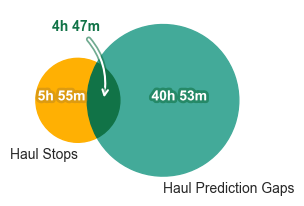

In [180]:
# venn diagram for trip 2 and 3 combined
from matplotlib_venn import venn2, venn2_circles

plt.figure(figsize=(3, 3))
# Use the venn2 function

nohaul_color = colors[18]
overlap_color = colors[17]
haulstop_color = colors[13]

haulstop_id = "100"
overlap_id = "110"
nohaul_id = "010"

haulstop_total = haulstop_total2 + haulstop_total3
total_nohaul = total_nohaul2 + total_nohaul3
overlap_nohaul = overlap_nohaul2 + overlap_nohaul3

haulstop_total
v = venn2(
    subsets=(haulstop_total, total_nohaul, overlap_nohaul),
    set_labels=("Haul Stops", "Haul Prediction Gaps"),
)

v.get_label_by_id(haulstop_id).set_text("")
v.get_label_by_id(overlap_id).set_text("")
v.get_label_by_id(nohaul_id).set_text("")
v.get_label_by_id("A").set_fontsize(10)
v.get_label_by_id("B").set_fontsize(10)


v.get_patch_by_id(overlap_id).set_color(overlap_color)  # overlap
v.get_patch_by_id(overlap_id).set_alpha(1)

v.get_patch_by_id(nohaul_id).set_color(nohaul_color)  # no haul prediction
v.get_patch_by_id(nohaul_id).set_alpha(1)

v.get_patch_by_id(haulstop_id).set_color(haulstop_color)  # haul stops
v.get_patch_by_id(haulstop_id).set_alpha(1)


plt.annotate(
    format_hours_minutes(total_nohaul - overlap_nohaul),
    xy=v.get_label_by_id(nohaul_id).get_position(),
    xytext=(0, 0),
    ha="center",
    textcoords="offset points",
    fontsize=10,
    color="white",
    weight="bold",
    path_effects=[pe.withStroke(linewidth=4, foreground=colors[17], alpha=0.6)],
)

plt.annotate(
    format_hours_minutes(overlap_nohaul),
    xy=v.get_label_by_id(overlap_id).get_position(),
    xytext=(-20, 50),
    ha="center",
    textcoords="offset points",
    fontsize=10,
    color=overlap_color,
    weight="bold",
    # path_effects=[pe.withStroke(linewidth=4, foreground=overlap_color, alpha = 1)],
    arrowprops=dict(
        arrowstyle="->",
        lw=1.5,
        connectionstyle="arc3,rad=-0.3",
        color="white",
        edgecolor=overlap_color,
        path_effects=[pe.withStroke(linewidth=4, foreground=overlap_color, alpha=0.6)],
    ),
    # bbox=dict(boxstyle='round,pad=0.2', fc=overlap_color, edgecolor = overlap_color, alpha = 1 )
)

plt.annotate(
    format_hours_minutes(haulstop_total - overlap_nohaul),
    xy=v.get_label_by_id(haulstop_id).get_position(),
    xytext=(0, 0),
    ha="center",
    textcoords="offset points",
    fontsize=10,
    color="white",
    weight="bold",
    path_effects=[pe.withStroke(linewidth=4, foreground=colors[12], alpha=0.6)],
    # bbox=dict(boxstyle='round,pad=0.5', fc=, edgecolor = overlap_color, alpha = 1 )
)

plt.savefig("haul_stop_venn.png", bbox_inches="tight")

In [235]:
overlap_nohaul / haulstop_total

0.4449685534591195

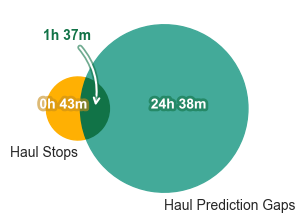

In [181]:
# venn diagram for trip 3
from matplotlib_venn import venn2, venn2_circles

plt.figure(figsize=(3, 3))
# Use the venn2 function

nohaul_color = colors[18]
overlap_color = colors[17]
haulstop_color = colors[13]

haulstop_id = "100"
overlap_id = "110"
nohaul_id = "010"

v = venn2(
    subsets=(overlap_total3, total_nohaul3, overlap_nohaul3),
    set_labels=("Haul Stops", "Haul Prediction Gaps"),
)

v.get_label_by_id(haulstop_id).set_text("")
v.get_label_by_id(overlap_id).set_text("")
v.get_label_by_id(nohaul_id).set_text("")
v.get_label_by_id("A").set_fontsize(10)
v.get_label_by_id("B").set_fontsize(10)


v.get_patch_by_id(overlap_id).set_color(overlap_color)  # overlap
v.get_patch_by_id(overlap_id).set_alpha(1)

v.get_patch_by_id(nohaul_id).set_color(nohaul_color)  # no haul prediction
v.get_patch_by_id(nohaul_id).set_alpha(1)

v.get_patch_by_id(haulstop_id).set_color(haulstop_color)  # haul stops
v.get_patch_by_id(haulstop_id).set_alpha(1)


plt.annotate(
    format_hours_minutes(total_nohaul3 - overlap_nohaul3),
    xy=v.get_label_by_id(nohaul_id).get_position(),
    xytext=(0, 0),
    ha="center",
    textcoords="offset points",
    fontsize=10,
    color="white",
    weight="bold",
    path_effects=[pe.withStroke(linewidth=4, foreground=colors[17], alpha=0.6)],
)

plt.annotate(
    format_hours_minutes(overlap_nohaul3),
    xy=v.get_label_by_id(overlap_id).get_position(),
    xytext=(-20, 50),
    ha="center",
    textcoords="offset points",
    fontsize=10,
    color=overlap_color,
    weight="bold",
    # path_effects=[pe.withStroke(linewidth=4, foreground=overlap_color, alpha = 1)],
    arrowprops=dict(
        arrowstyle="->",
        lw=1.5,
        connectionstyle="arc3,rad=-0.3",
        color="white",
        edgecolor=overlap_color,
        path_effects=[pe.withStroke(linewidth=4, foreground=overlap_color, alpha=0.6)],
    ),
    # bbox=dict(boxstyle='round,pad=0.2', fc=overlap_color, edgecolor = overlap_color, alpha = 1 )
)

plt.annotate(
    format_hours_minutes(overlap_total3 - overlap_nohaul3),
    xy=v.get_label_by_id(haulstop_id).get_position(),
    xytext=(0, 0),
    ha="center",
    textcoords="offset points",
    fontsize=10,
    color="white",
    weight="bold",
    path_effects=[pe.withStroke(linewidth=4, foreground=colors[12], alpha=0.6)],
    # bbox=dict(boxstyle='round,pad=0.5', fc=, edgecolor = overlap_color, alpha = 1 )
)

plt.savefig("haul_stop_venn3.png", bbox_inches="tight")

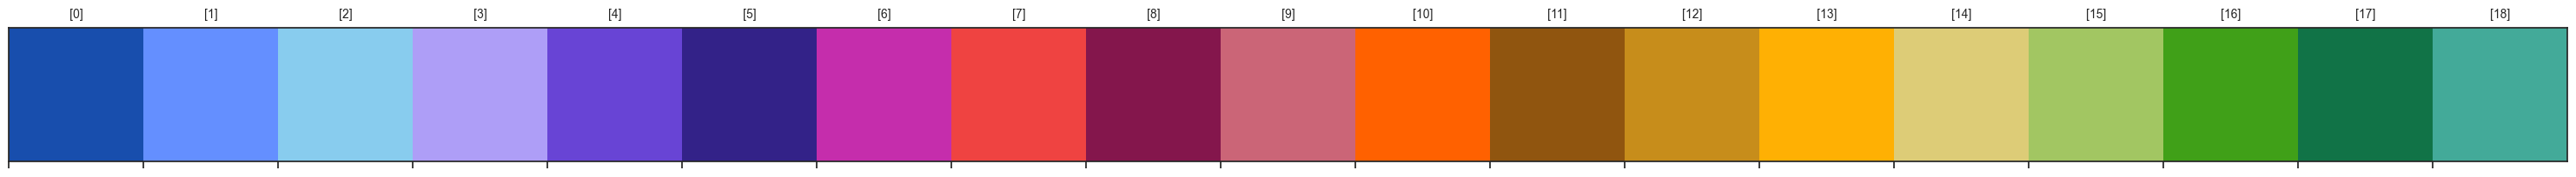

In [637]:
show_color_pallete()

In [625]:
v.id2idx

{'10': 0,
 '01': 1,
 '11': 2,
 '100': 0,
 '010': 1,
 '110': 2,
 '001': 3,
 '101': 4,
 '011': 5,
 '111': 6,
 'A': 0,
 'B': 1,
 'C': 2}

In [606]:
(8 * 60) + 16

496

In [607]:
overlap_total

496.0

In [605]:
overlap_total % 60

16.0

### association metrics

In [242]:
def chi_square_test(col1, col2, df):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

In [347]:
# Perform Chi-Square Test for each pair of events
chi2_dict = {}
for category in category_cols:
    chi2, p = chi_square_test("predict_haul", category, df_category_only_hauls)
    chi2_dict[category] = {"chi2": chi2, "p": p}

In [348]:
chi2_dict

{'predict_haul': {'chi2': 781.2243886827588, 'p': 6.520448230667543e-172},
 'is_haul_stop': {'chi2': 0.3651864135773119, 'p': 0.5456398484380021},
 'is_no_video': {'chi2': 0.02182951462357518, 'p': 0.88254153362255},
 'is_no_elog': {'chi2': 0.0, 'p': 1.0},
 'is_camera_covered': {'chi2': 0.0, 'p': 1.0},
 'is_abnormal_catch': {'chi2': 3.4598348662207363, 'p': 0.06287659409515958},
 'is_abnormal_haul': {'chi2': 2.4022967793212087, 'p': 0.12115725153022712},
 'is_other_gear': {'chi2': 17.83123906546777, 'p': 2.413874783376097e-05}}

In [349]:
coocc = df_category_only_hauls.T.dot(df_category_only_hauls)

In [350]:
coocc

,predict_haul,is_haul_stop,is_no_video,is_no_elog,is_camera_covered,is_abnormal_catch,is_abnormal_haul,is_other_gear,video_haul_stop,predict_no_haul
predict_haul,552,90,2,0,1,16,45,48,93,0
is_haul_stop,90,133,0,0,0,11,27,0,133,43
is_no_video,2,0,2,0,0,0,0,0,2,0
is_no_elog,0,0,0,0,0,0,0,0,0,0
is_camera_covered,1,0,0,0,1,0,0,0,1,0
is_abnormal_catch,16,11,0,0,0,30,23,0,11,14
is_abnormal_haul,45,27,0,0,0,23,73,0,27,28
is_other_gear,48,0,0,0,0,0,0,49,0,1
video_haul_stop,93,133,2,0,1,11,27,0,136,43
predict_no_haul,0,43,0,0,0,14,28,1,43,234


In [355]:
len_cats = len(df_category_only_hauls)

In [356]:
x = "is_haul_stop"
y = "predict_no_haul"
z = "predict_haul"
coocc[x][y] / coocc[x][x]

0.3233082706766917

In [357]:
coocc[y][y] + coocc[z][z]

786

In [360]:
def association_confidence(x, y, coocc):
    confidence = coocc[x][y] / coocc[x][x]

    fraction_y = coocc[y][y] / len_cats

    lift = confidence / fraction_y

    return confidence, lift

In [361]:
for category in category_cols:
    print(category)
    confidence, lift = association_confidence(category, "predict_no_haul", coocc)
    print(f"confidence: {confidence}, lift: {lift}")

predict_haul
confidence: 0.0, lift: 0.0
is_haul_stop
confidence: 0.18376068376068377, lift: 1.0859841912473491
is_no_video
confidence: 0.0, lift: 0.0
is_no_elog
confidence: 0.0, lift: nan
is_camera_covered
confidence: 0.0, lift: 0.0
is_abnormal_catch
confidence: 0.05982905982905983, lift: 1.5675213675213675
is_abnormal_haul
confidence: 0.11965811965811966, lift: 1.2883737267298911
is_other_gear
confidence: 0.004273504273504274, lift: 0.0685504971219257


In [359]:
for category in category_cols:
    print(category)
    confidence, lift = association_confidence(category, "predict_no_haul", coocc)
    print(f"confidence: {confidence}, lift: {lift}")

predict_haul
confidence: 0.0, lift: 0.0
is_haul_stop
confidence: 0.3233082706766917, lift: 1.0859841912473491
is_no_video
confidence: 0.0, lift: 0.0
is_no_elog
confidence: nan, lift: nan
is_camera_covered
confidence: 0.0, lift: 0.0
is_abnormal_catch
confidence: 0.4666666666666667, lift: 1.5675213675213675
is_abnormal_haul
confidence: 0.3835616438356164, lift: 1.2883737267298911
is_other_gear
confidence: 0.02040816326530612, lift: 0.0685504971219257
